In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('donnees_nettoyees.csv')
df

### Gerer les types de donnees

In [3]:
age_order = ['Moins de 18 ans', '18 - 25 ans', '25 - 30 ans', '30 - 40 ans', '40 et plus']
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)
df['sexe'] = df['sexe'].astype('category')
df['plateforme_preferee'] = df['plateforme_preferee'].astype('category')
df['appareils_utilises'] = df['appareils_utilises'].astype('string')
df['horodateur'] = pd.to_datetime(df['horodateur'])

df['temps_reseaux'] = df['temps_reseaux'].astype('string')
df['temps_jeux'] = df['temps_jeux'].astype('string')
df['temps_streaming'] = df['temps_streaming'].astype('string')

df.dtypes

horodateur             datetime64[ns]
age                          category
sexe                         category
temps_reseaux          string[python]
temps_streaming        string[python]
temps_jeux             string[python]
plateforme_preferee          category
appareils_utilises     string[python]
temps_reseaux_mns             float64
temps_streaming_mns           float64
temps_jeux_mns                float64
dtype: object

### Analyse descriptive des donnees 

In [4]:
#Moyenne et medianne du temps passe par activite
MED_MOY = df[["temps_reseaux_mns", "temps_streaming_mns", "temps_jeux_mns"]].agg(['mean','median'])
rename = MED_MOY.rename(index={'mean':'Moyennes','median':'Medianes'})
resultat_arrondis = rename.round(2)
resultat_arrondis

,temps_reseaux_mns,temps_streaming_mns,temps_jeux_mns
Moyennes,233.75,143.75,47.77
Medianes,180.00,82.50,7.50


In [17]:
#Répartition des plateformes préférées par tranche dʼâge
df.groupby(['plateforme_preferee','age']).size().unstack(fill_value=0)

C:\Users\Windows 10 7em Gen\AppData\Local\Temp\ipykernel_22180\3815130292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['plateforme_preferee','age']).size().unstack(fill_value=0)


age,Moins de 18 ans,18 - 25 ans,25 - 30 ans,30 - 40 ans,40 et plus
plateforme_preferee,,,,,
Facebook,0,5,2,0,0
Instagram,0,12,0,1,0
LinkedIn,0,3,0,2,0
Netflix,2,1,0,0,0
Snapchat,0,1,0,1,0
Telegram,1,0,1,0,0
TikTok,0,7,0,0,1
WhatsApp,0,18,5,1,0
X (Twitter),0,1,0,0,2


### Répartition des plateformes préférées par sexe

In [6]:
df.groupby(['plateforme_preferee','sexe']).size().unstack(fill_value=0)

C:\Users\Windows 10 7em Gen\AppData\Local\Temp\ipykernel_22180\240255573.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['plateforme_preferee','sexe']).size().unstack(fill_value=0)


sexe,Femme,Homme,Je ne souhaite pas le préciser
plateforme_preferee,,,
Facebook,3,4,0
Instagram,5,7,1
LinkedIn,2,3,0
Netflix,3,0,0
Snapchat,2,0,0
Telegram,1,1,0
TikTok,5,3,0
WhatsApp,11,13,0
X (Twitter),1,2,0


### Taux dʼutilisation des différents appareils

In [ ]:

df_explode = df['appareils_utilises'].str.split(', ').explode()

df_explode = df_explode.str.strip().str.lower()

taux_unique = (df_explode.value_counts(normalize=True) * 100).round(1)

print("Taux d'utilisation par appareil (%):")
taux_unique

Taux d'utilisation par appareil (%):


appareils_utilises
smartphone          70.5
ordinateur          16.2
tablette             6.7
casque virtuelle     3.8
console de jeu       1.9
television           1.0
Name: proportion, dtype: float64

In [ ]:
# quantite smartphone dans la liste
df_explode.eq('smartphone').sum()

np.int64(74)

In [9]:
#Nombre total appareil dans la liste
df_explode.count().sum()

np.int64(105)

### Bonus 

In [20]:
pd.crosstab(df['plateforme_preferee'], df['appareils_utilises']).style.background_gradient()

appareils_utilises,Ordinateur,"Ordinateur, Casque virtuelle","Ordinateur, Casque virtuelle, Console de Jeu","Ordinateur, Tablette","Ordinateur, Television",Smartphone,"Smartphone, Casque virtuelle","Smartphone, Ordinateur","Smartphone, Ordinateur, Console de Jeu","Smartphone, Ordinateur, Tablette","Smartphone, Tablette",Tablette
plateforme_preferee,,,,,,,,,,,,
Facebook,0,0,1,0,0,6,0,0,0,0,0,0
Instagram,0,1,0,0,0,11,0,0,0,0,0,1
LinkedIn,1,0,0,0,0,2,1,1,0,0,0,0
Netflix,0,0,0,0,0,3,0,0,0,0,0,0
Snapchat,0,0,0,0,0,1,0,0,0,0,1,0
Telegram,0,0,0,1,0,0,0,0,1,0,0,0
TikTok,0,0,0,0,0,6,0,2,0,0,0,0
WhatsApp,1,0,0,0,0,21,0,1,0,0,1,0
X (Twitter),0,1,0,0,1,1,0,0,0,0,0,0


In [ ]:
#df.drop(columns={'nb_activites > 60mns'},inplace=True)
df

,horodateur,age,sexe,temps_reseaux,temps_streaming,temps_jeux,plateforme_preferee,appareils_utilises,temps_reseaux_mns,temps_streaming_mns,temps_jeux_mns
0,2025-03-27 00:06:58,18 - 25 ans,Femme,2 heures - 4 heures,45 minutes - 2 heures,moins de 15 minutes,Snapchat,Smartphone,180.0,82.5,7.5
1,2025-03-27 00:16:08,18 - 25 ans,Homme,45 minutes - 2 heures,45 minutes - 2 heures,45 minutes - 2 heures,WhatsApp,Smartphone,82.5,82.5,82.5
2,2025-03-27 00:17:11,18 - 25 ans,Homme,45 minutes - 2 heures,plus de 8 heures,moins de 15 minutes,LinkedIn,Smartphone,82.5,600.0,7.5
3,2025-03-27 00:18:48,18 - 25 ans,Femme,plus de 8 heures,moins de 15 minutes,moins de 15 minutes,WhatsApp,Smartphone,600.0,7.5,7.5
4,2025-03-27 00:31:05,18 - 25 ans,Homme,plus de 8 heures,15 minutes - 45 minutes,moins de 15 minutes,Facebook,Smartphone,600.0,30.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...
79,2025-03-28 14:30:01,18 - 25 ans,Homme,15 minutes - 45 minutes,4 heures - 8 heures,4 heures - 8 heures,Facebook,"Ordinateur, Casque virtuelle, Console de Jeu",30.0,360.0,360.0
80,2025-03-28 14:31:16,30 - 40 ans,Homme,45 minutes - 2 heures,15 minutes - 45 minutes,15 minutes - 45 minutes,WhatsApp,"Smartphone, Tablette",82.5,30.0,30.0
81,2025-03-28 14:32:08,40 et plus,Homme,moins de 15 minutes,15 minutes - 45 minutes,moins de 15 minutes,X (Twitter),"Ordinateur, Television",7.5,30.0,7.5
82,2025-03-28 14:33:06,Moins de 18 ans,Homme,2 heures - 4 heures,45 minutes - 2 heures,4 heures - 8 heures,Telegram,"Smartphone, Ordinateur, Console de Jeu",180.0,82.5,360.0


### Histogramme

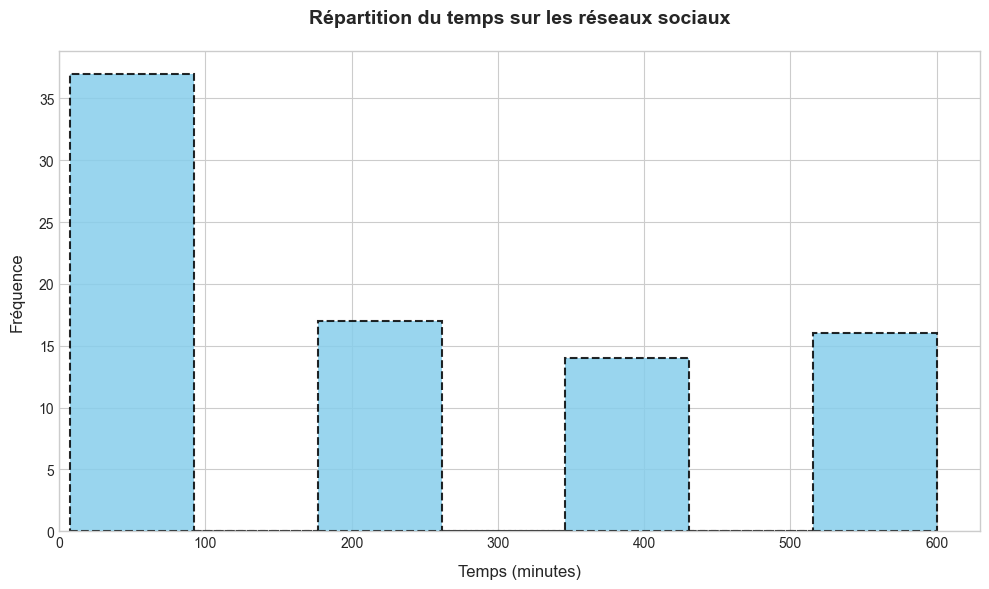

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(10,6))
plt.hist(df['temps_reseaux_mns'],bins=7,color='skyblue',edgecolor='black',linestyle='--',linewidth=1.5,alpha=0.85)

plt.title('Répartition du temps sur les réseaux sociaux',fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Temps (minutes)', fontsize=12, labelpad=10)
plt.ylabel('Fréquence', fontsize=12, labelpad=10)

plt.xlim(left=0)  
plt.tight_layout() 
plt.show()

### Diagramme en barre

Text(0, 0.5, '')

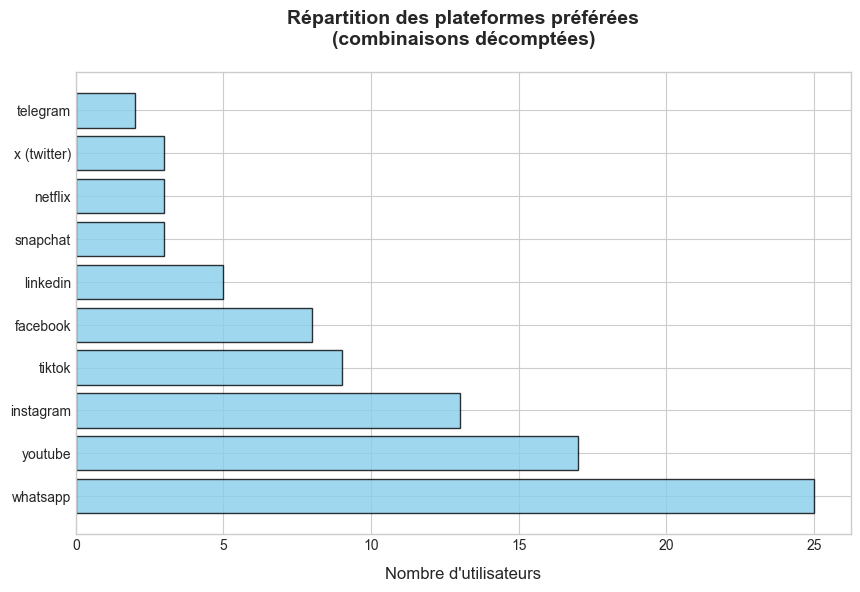

In [ ]:

df_explode_plateforme = df['plateforme_preferee'].str.split(', ').explode()
df_explode_plateforme = df_explode_plateforme.str.strip().str.lower() 

platform_counts = df_explode_plateforme.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.barh(platform_counts.index, platform_counts.values, 
                color='skyblue', alpha=0.8, edgecolor='black',linestyle='-')

plt.title('Répartition des plateformes préférées\n(combinaisons décomptées)',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Nombre d\'utilisateurs', fontsize=12, labelpad=10)
plt.ylabel('') 

### Camembert

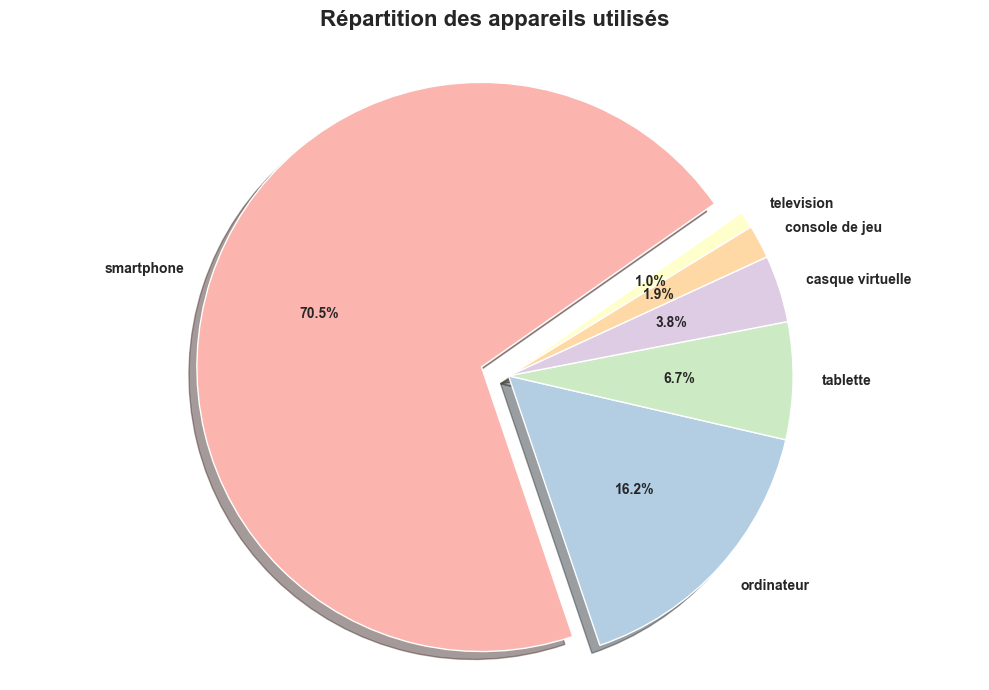

In [ ]:

df_explode = df['appareils_utilises'].str.split(', ').explode()

df_explode = df_explode.str.strip().str.lower()

appareil_counts = df_explode.value_counts()

plt.figure(figsize=(10, 7))
explode = [0.1 if i == appareil_counts.idxmax() else 0 for i in appareil_counts.index] 


patches, texts, autotexts = plt.pie(
    appareil_counts,
    labels=appareil_counts.index,
    autopct='%1.1f%%',
    startangle=35,
    colors=plt.cm.Pastel1.colors,
    explode=explode,
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)


plt.title('Répartition des appareils utilisés', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal') 
plt.style.use('seaborn-v0_8-whitegrid') 

for text in texts + autotexts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()

### Bonus

C:\Users\Windows 10 7em Gen\AppData\Local\Temp\ipykernel_22180\1357876508.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_time = df.groupby('age')[['temps_reseaux_mns', 'temps_streaming_mns', 'temps_jeux_mns']].mean()


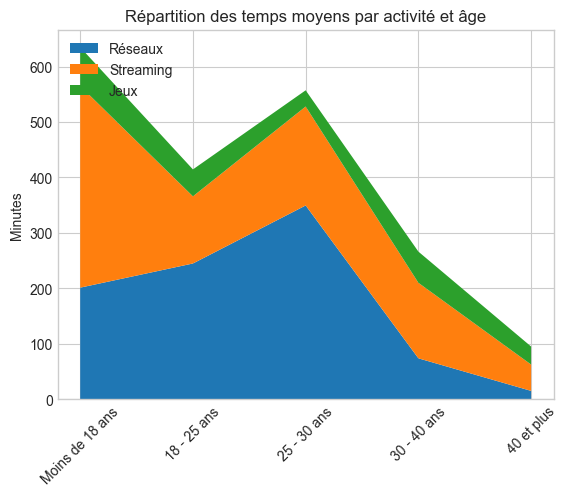

In [ ]:
# Calcul des moyennes
mean_time = df.groupby('age')[['temps_reseaux_mns', 'temps_streaming_mns', 'temps_jeux_mns']].mean()

fig, ax = plt.subplots()
ax.stackplot(mean_time.index, 
             mean_time['temps_reseaux_mns'], 
             mean_time['temps_streaming_mns'], 
             mean_time['temps_jeux_mns'],
             labels=['Réseaux', 'Streaming', 'Jeux'])
ax.set_title('Répartition des temps moyens par activité et âge')
ax.set_ylabel('Minutes')
ax.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()